In [2]:
%%time
cycle_share = pd.read_csv('cycle_share.csv')

Wall time: 3.69 s


<string>:2: DtypeWarning: Columns (21,39) have mixed types. Specify dtype option on import or set low_memory=False.


In [1]:
%%time
from __future__ import division
from __future__ import print_function

import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from patsy import dmatrix, dmatrices

import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
pd.options.display.max_columns = 100

import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

import collections
from pprint import pprint
import pickle
import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Wall time: 24.7 s



|Feature| Type |Description
|----|----|----|
|trip_id  | ID| 이용 id
|starttime  |  |이용 시작시간
|stoptime  |  |이용 종료시간
|bikeid  | 카테고리| 자전거 id
|tripduration |  연속형| 이용기간(초) 
|from_station_name |카테고리 | 이용시작 정거장 
|to_station_name |카테고리 | 이용 종료 정거장
|from_station_id | 카테고리|    이용시작 정거장 id   
|to_station_id   |카테고리 |  이용 종료 정거장 id
|usertype   | 카테고리| 유저 타입
|gender    | 카테고리| 유저 성별                   
|age    |연속형 | 유저 나이
|Date         | | 이용 시작일자              
|station_id      | 카테고리|  정거장 id             
|name               | 카테고리|  이용시작 정거장          
|lat                   | 연속형 |  위도      
|long                     | 연속형 | 경도     
|install_date                | 카테고리 | 정거장 설치 날짜  
|install_dockcount              | 연속형 | 정거장의 dock 갯수
|modification_date              | | 스테이션이 수정되어 위치 또는 도킹 개수가 변경된 날짜
|current_dockcount             | 연속형 |  160831 기준 각 스테이션의 독 개수
|decommission_date               | | 정거장이 서비스를 종료 한 날짜
|Max_Temperature_F               | 연속형 | 그 날의 최고 온도
|Mean_Temperature_F             |  연속형| 그 날의 평균 온도
|Min_TemperatureF             | 연속형| 그 날의 최저 온도
|Max_Dew_Point_F                 |연속형 | 그 날의 최고 이슬점
|MeanDew_Point_F                |연속형| 그 날의 평균 이슬점
|Min_Dewpoint_F  | 연속형| 그 날의 최저 이슬점
|Max_Humidity       |연속형 |  그 날의 최고 습도         
|Mean_Humidity         | 연속형|  그 날의 평균 습도  
|Min_Humidity             | 연속형|   그 날의 최저 습도    
|Max_Sea_Level_Pressure_In   | 연속형|  그 날의 최고 해수면 높이  
|Mean_Sea_Level_Pressure_In     |연속형 | 그 날의 평균 해수면 높이
|Min_Sea_Level_Pressure_In       |연속형 | 그 날의 최저 해수면 높이
|Max_Visibility_Miles            | 연속형| 그 날의 최고 가시거리(mile)
|Mean_Visibility_Miles           | 연속형| 그 날의 평균 가시거리(mile)
|Min_Visibility_Miles            | 연속형| 그 날의 최저 가시거리(mile)
|Max_Wind_Speed_MPH              |연속형 | 그 날의 최고 풍속
|Mean_Wind_Speed_MPH            | 연속형| 그 날의 평균 풍속
|Max_Gust_Speed_MPH             | 연속형| 그 날의 최고 돌풍
|Precipitation_In                |연속형 | 그 날의 강수량
|Events                         |카테고리 | 그 날의 날씨
|from_station_area  | 카테고리 | 정거장이 존재하는 지역
|day |카테고리| 일 표기 (월요일부터 일요일까지 차례대로 0~6)
|weekend |카테고리| 주말, 평일 표기
|Gender_F |카테고리|여성 여부 표기(더미)
|Gender_M |카테고리|남성 여부 표기(더미)
|Gender_O |카테고리|성별 표기(더미)
|Snow|카테고리| 눈 여부(더미)
|Thunderstorm|카테고리| 천둥 여부(더미)
|Fog|카테고리| 안개 여부(더미)
|Rain|카테고리| 비 여부(더미)

In [6]:
cycle_share.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,Date,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,from_station_area,day,weekend,from_station_area[BT],from_station_area[CBD],from_station_area[CD],from_station_area[CH],from_station_area[DPD],from_station_area[EL],from_station_area[FH],from_station_area[ID],from_station_area[PS],from_station_area[SLU],from_station_area[UD],from_station_area[UW],from_station_area[WF],Gender_F,Gender_M,Gender_O,Snow,Thunderstorm,Fog,Rain
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,57.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,47.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,29.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,40.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1


In [99]:
# 의사결정나무 시각화 함수
import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
def draw_tree(classifier, feature_names):
    dot_buf = StringIO.StringIO()
    export_graphviz(classifier, 
                    out_file=dot_buf, 
                    feature_names = feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [4]:
from sklearn.ensemble import ExtraTreesRegressor
erf_c = ExtraTreesRegressor(criterion = 'mse',
                            n_estimators = 1000,
                            random_state = 10)

In [4]:
%%time
cs_erf_f = cycle_share[cycle_share.usertype == 'Member'][['age', 'Mean_Temperature_F', 'MeanDew_Point_F',  
                                                         'Mean_Humidity', 'Mean_Sea_Level_Pressure_In', 
                                                         'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 
                                                         'Precipitation_In', 'day', 'weekend', 'Gender_F', 
                                                         'Gender_M', 'Gender_O', 'from_station_area[BT]',
                                                         'from_station_area[CBD]', 'from_station_area[CD]',
                                                         'from_station_area[CH]', 'from_station_area[DPD]', 
                                                         'from_station_area[EL]', 'from_station_area[FH]', 
                                                         'from_station_area[ID]', 'from_station_area[PS]',
                                                         'from_station_area[SLU]', 'from_station_area[UD]',
                                                         'from_station_area[UW]', 'from_station_area[WF]',
                                                         'Rain', 'Snow', 'Fog', 'Thunderstorm']]  

cs_erf_t = cycle_share.tripduration[cycle_share.usertype == 'Member']

Wall time: 745 ms


In [5]:
# 잠시만...
cs_erf_t = cs_erf_t[~cs_erf_f.Mean_Temperature_F.isnull()]
cs_erf_t = cs_erf_t[~cs_erf_f.age.isnull()]
cs_erf_t.isnull().sum()

0

In [6]:
# 잠시만...
cs_erf_f = cs_erf_f[~cs_erf_f.Mean_Temperature_F.isnull()]
cs_erf_f = cs_erf_f[~cs_erf_f.age.isnull()]
cs_erf_f.isnull().sum()

age                           0
Mean_Temperature_F            0
MeanDew_Point_F               0
Mean_Humidity                 0
Mean_Sea_Level_Pressure_In    0
Mean_Visibility_Miles         0
Mean_Wind_Speed_MPH           0
Precipitation_In              0
day                           0
weekend                       0
Gender_F                      0
Gender_M                      0
Gender_O                      0
from_station_area[BT]         0
from_station_area[CBD]        0
from_station_area[CD]         0
from_station_area[CH]         0
from_station_area[DPD]        0
from_station_area[EL]         0
from_station_area[FH]         0
from_station_area[ID]         0
from_station_area[PS]         0
from_station_area[SLU]        0
from_station_area[UD]         0
from_station_area[UW]         0
from_station_area[WF]         0
Rain                          0
Snow                          0
Fog                           0
Thunderstorm                  0
dtype: int64

In [8]:
cs_erf_f[['age', 'Mean_Temperature_F', 'MeanDew_Point_F', 'Mean_Humidity', 
          'Mean_Sea_Level_Pressure_In', 'Mean_Visibility_Miles', 
          'Mean_Wind_Speed_MPH', 'Precipitation_In']].describe()

,age,Mean_Temperature_F,MeanDew_Point_F,Mean_Humidity,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In
count,146118.000000,146118.000000,146118.000000,146118.000000,146118.000000,146118.000000,146118.000000,146118.000000
mean,37.121799,58.743604,46.064735,66.172333,30.040224,9.530017,4.379495,0.073603
std,10.154788,10.143749,7.476032,12.567640,0.176856,1.058568,2.508691,0.182295
min,18.000000,33.000000,4.000000,24.000000,29.310000,1.000000,0.000000,0.000000
25%,30.000000,50.000000,42.000000,57.000000,29.940000,10.000000,3.000000,0.000000
50%,34.000000,59.000000,47.000000,67.000000,30.040000,10.000000,4.000000,0.000000
75%,42.000000,66.000000,52.000000,76.000000,30.150000,10.000000,6.000000,0.040000
max,86.000000,83.000000,59.000000,95.000000,30.810000,10.000000,15.000000,2.200000


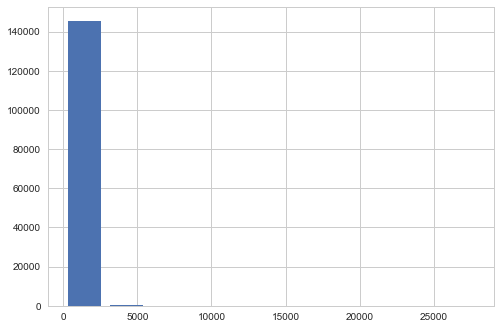

In [49]:
plt.hist(cs_erf_t, rwidth=0.8)
plt.show()

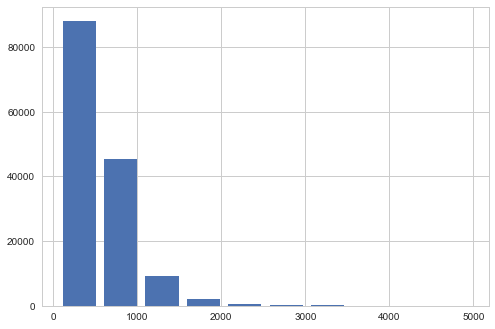

In [83]:
plt.hist(cs_erf_t[cs_erf_t < 5000], rwidth=0.8)
plt.show()

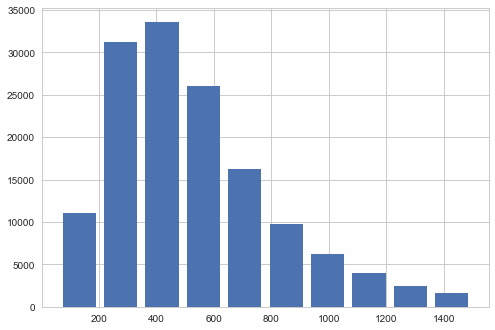

In [84]:
plt.hist(cs_erf_t[cs_erf_t < 1500], rwidth=0.8)
plt.show()

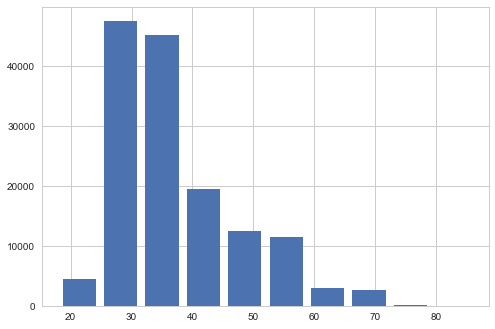

In [50]:
plt.hist(cs_erf_f['age'], rwidth=0.8)
plt.show()

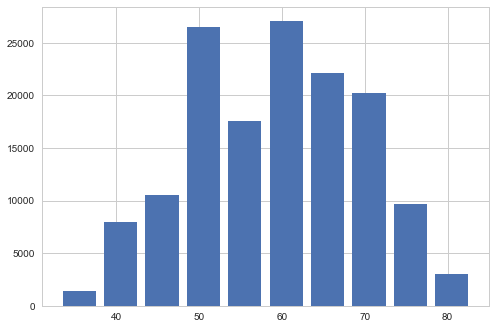

In [52]:
plt.hist(cs_erf_f['Mean_Temperature_F'], rwidth=0.8)
plt.show()

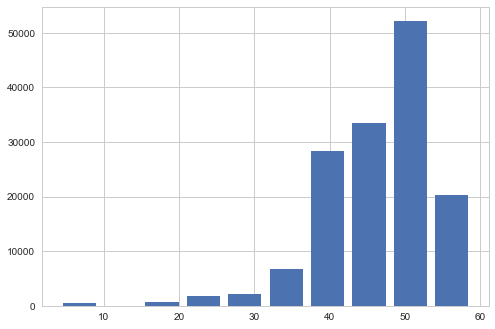

In [53]:
plt.hist(cs_erf_f['MeanDew_Point_F'], rwidth=0.8)
plt.show()

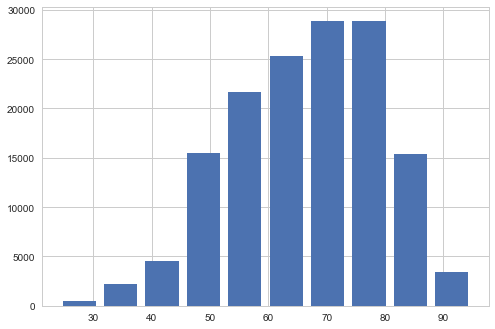

In [54]:
plt.hist(cs_erf_f['Mean_Humidity'], rwidth=0.8)
plt.show()

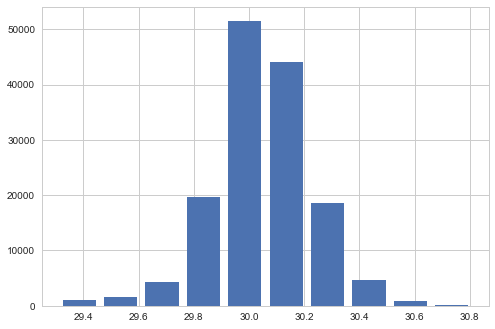

In [55]:
plt.hist(cs_erf_f['Mean_Sea_Level_Pressure_In'], rwidth=0.8)
plt.show()

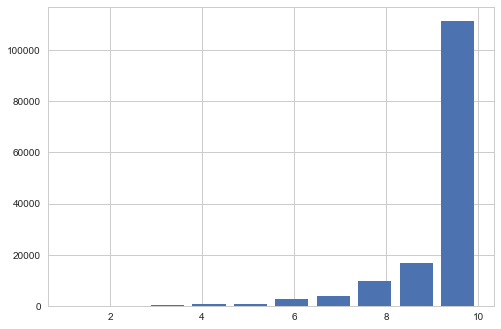

In [56]:
plt.hist(cs_erf_f['Mean_Visibility_Miles'], rwidth=0.8)
plt.show()

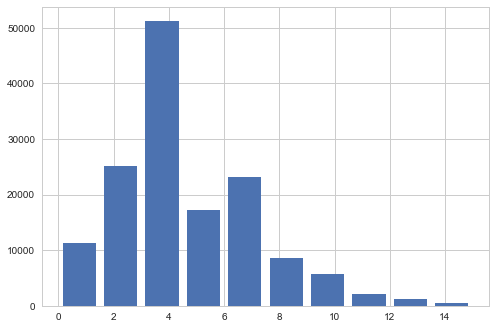

In [58]:
plt.hist(cs_erf_f['Mean_Wind_Speed_MPH'], rwidth=0.8)
plt.show()

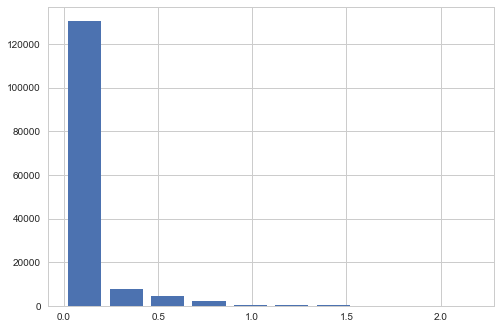

In [59]:
plt.hist(cs_erf_f['Precipitation_In'], rwidth=0.8)
plt.show()

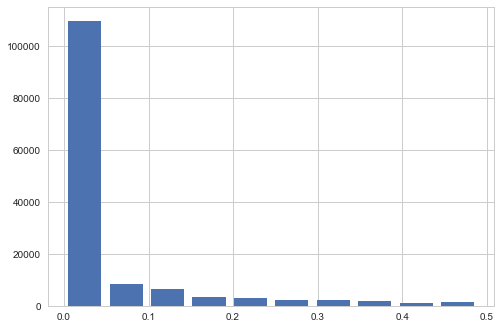

In [87]:
plt.hist(cs_erf_f['Precipitation_In'][cs_erf_f['Precipitation_In'] < 0.5], rwidth=0.8)
plt.show()

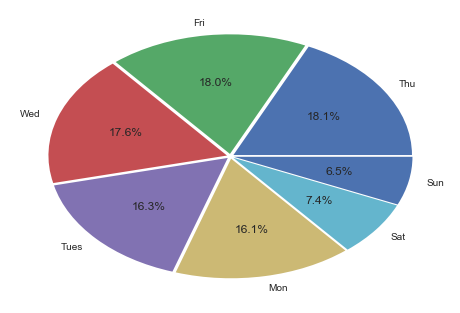

Thu     26409
Fri     26267
Wed     25779
Tues    23806
Mon     23488
Sat     10828
Sun      9541
Name: day, dtype: int64


In [78]:
plt.pie(cs_erf_f['day'].value_counts(), 
        labels=['Thu', 'Fri', 'Wed', 'Tues', 'Mon', 'Sat', 'Sun'], 
        explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02),
        autopct='%1.1f%%')
plt.show()
day = cs_erf_f['day'].value_counts()
day.index = ['Thu', 'Fri', 'Wed', 'Tues', 'Mon', 'Sat', 'Sun']
print(day)

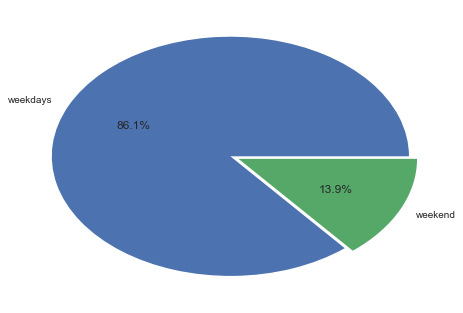

weekdays    125749
weekend      20369
Name: weekend, dtype: int64


In [75]:
plt.pie(cs_erf_f['weekend'].value_counts(), 
        labels=['weekdays', 'weekend'], 
        explode = (0, 0.05),
        autopct='%1.1f%%')
plt.show()
weekend = cs_erf_f['weekend'].value_counts()
weekend.index = ['weekdays', 'weekend']
print(weekend)

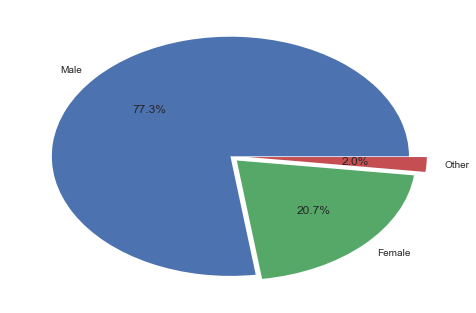

Male      112938
Female     30329
Other       2901
Name: gender, dtype: int64


In [73]:
plt.pie(cycle_share['gender'][cycle_share.usertype == 'Member'].value_counts(),
        labels = cycle_share['gender'][cycle_share.usertype == 'Member'].value_counts().index,
        explode = (0, 0.05, 0.1),
        autopct='%1.1f%%')
plt.show()
print(cycle_share['gender'][cycle_share.usertype == 'Member'].value_counts())

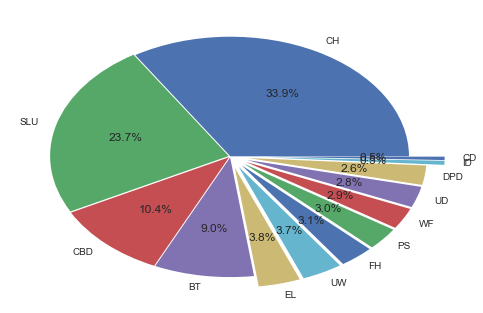

CH     49606
SLU    34693
CBD    15250
BT     13198
EL      5535
UW      5361
FH      4524
PS      4435
WF      4173
UD      4117
DPD     3822
ID       787
CD       667
Name: from_station_area, dtype: int64


In [72]:
plt.pie(cycle_share[cycle_share.usertype == 'Member']['from_station_area'].value_counts(), 
        labels = cycle_share[cycle_share.usertype == 'Member']['from_station_area'].value_counts().index, 
        explode = (0, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2),
        autopct='%1.1f%%')
plt.show()
print(cycle_share[cycle_share.usertype == 'Member']['from_station_area'].value_counts())

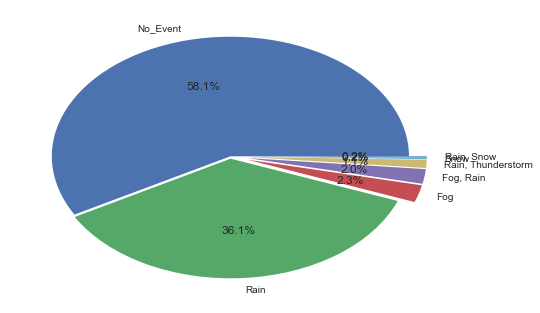

No_Event              84926
Rain                  52831
Fog                    3386
Fog, Rain              2877
Rain, Thunderstorm     1613
Snow                    308
Rain, Snow              227
Name: Events, dtype: int64


In [82]:
Events_pie = cycle_share[cycle_share.usertype == 'Member']['Events'].replace(value=['No_Event', 'Rain', 'Fog', 'Fog, Rain', 'Fog, Rain',
                                     'Rain, Thunderstorm', 'Rain, Thunderstorm', 'Snow', 
                                     'Rain, Snow', 'Rain, Snow'], 
                              to_replace=list(cycle_share[cycle_share.usertype == 'Member']['Events'].value_counts().index))
plt.pie(Events_pie.value_counts(), 
        labels=Events_pie.value_counts().index,
        explode = (0, 0.02, 0.1, 0.1, 0.1, 0.1, 0.1),
        autopct='%1.1f%%')
plt.show()
print(Events_pie.value_counts())

In [8]:
%%time
erf_c.fit(cs_erf_f, cs_erf_t)

CPU times: user 7min 24s, sys: 2.41 s, total: 7min 26s
Wall time: 7min 26s


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=1000, n_jobs=1, oob_score=False, random_state=10,
          verbose=0, warm_start=False)

In [13]:
%%time
pd.DataFrame(erf_c.feature_importances_, 
             index = cs_erf_f.columns,
             columns = ["Feature_Importance"]).sort(['Feature_Importance'], ascending=[0])

CPU times: user 2.39 s, sys: 0 ns, total: 2.39 s
Wall time: 2.39 s


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Feature_Importance
age,0.391617
Mean_Sea_Level_Pressure_In,0.090345
Mean_Humidity,0.081532
Mean_Temperature_F,0.073519
MeanDew_Point_F,0.072018
Mean_Wind_Speed_MPH,0.067069
day,0.051533
Precipitation_In,0.046344
Mean_Visibility_Miles,0.029952
Rain,0.015547


In [88]:
cs_dtr_f = cycle_share[cycle_share.usertype == 'Member'][['age', 'Mean_Sea_Level_Pressure_In', 'Mean_Humidity', 'Mean_Temperature_F', 
                                                         'MeanDew_Point_F', 'Mean_Wind_Speed_MPH', 'day', 'Precipitation_In', 
                                                         'Mean_Visibility_Miles','Rain']]

cs_dtr_f.reset_index(inplace = True)
del cs_dtr_f['index']

In [89]:
cs_dtr_t = cycle_share.tripduration[cycle_share.usertype == 'Member']
cs_dtr_t = cs_dtr_t.reset_index()
del cs_dtr_t['index']

In [90]:
# 잠시만...
cs_dtr_t = cs_dtr_t[~cs_dtr_f.Mean_Temperature_F.isnull()]
cs_dtr_t = cs_dtr_t[~cs_dtr_f.age.isnull()]
cs_dtr_t.isnull().sum()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


tripduration    0
dtype: int64

In [91]:
# 잠시만...
cs_dtr_f = cs_dtr_f[~cs_dtr_f.Mean_Temperature_F.isnull()]
cs_dtr_f = cs_dtr_f[~cs_dtr_f.age.isnull()]
cs_dtr_f.isnull().sum()

age                           0
Mean_Sea_Level_Pressure_In    0
Mean_Humidity                 0
Mean_Temperature_F            0
MeanDew_Point_F               0
Mean_Wind_Speed_MPH           0
day                           0
Precipitation_In              0
Mean_Visibility_Miles         0
Rain                          0
dtype: int64

In [92]:
train_list = []
test_list = []
for train_idx, test_idx in ShuffleSplit(n_splits=5, test_size=0.3, random_state=10).split(cs_dtr_f):
    train_list.append(train_idx)
    test_list.append(test_idx)

In [153]:
%%time
cs_dtr_fd0 = DecisionTreeRegressor(max_depth = 5, 
                                   random_state = 10).fit(cs_dtr_f.iloc[train_list[0]],
                                                          cs_dtr_t.iloc[train_list[0]])
cs_dtr_fd1 = DecisionTreeRegressor(max_depth = 5, 
                                   random_state = 10).fit(cs_dtr_f.iloc[train_list[1]], 
                                                          cs_dtr_t.iloc[train_list[1]])
cs_dtr_fd2 = DecisionTreeRegressor(max_depth = 5,  
                                   random_state = 10).fit(cs_dtr_f.iloc[train_list[2]], 
                                                          cs_dtr_t.iloc[train_list[2]])
cs_dtr_fd3 = DecisionTreeRegressor(max_depth = 5, 
                                   random_state = 10).fit(cs_dtr_f.iloc[train_list[3]], 
                                                          cs_dtr_t.iloc[train_list[3]])
cs_dtr_fd4 = DecisionTreeRegressor(max_depth = 5, 
                                   random_state = 10).fit(cs_dtr_f.iloc[train_list[4]], 
                                                          cs_dtr_t.iloc[train_list[4]])

Wall time: 1.46 s


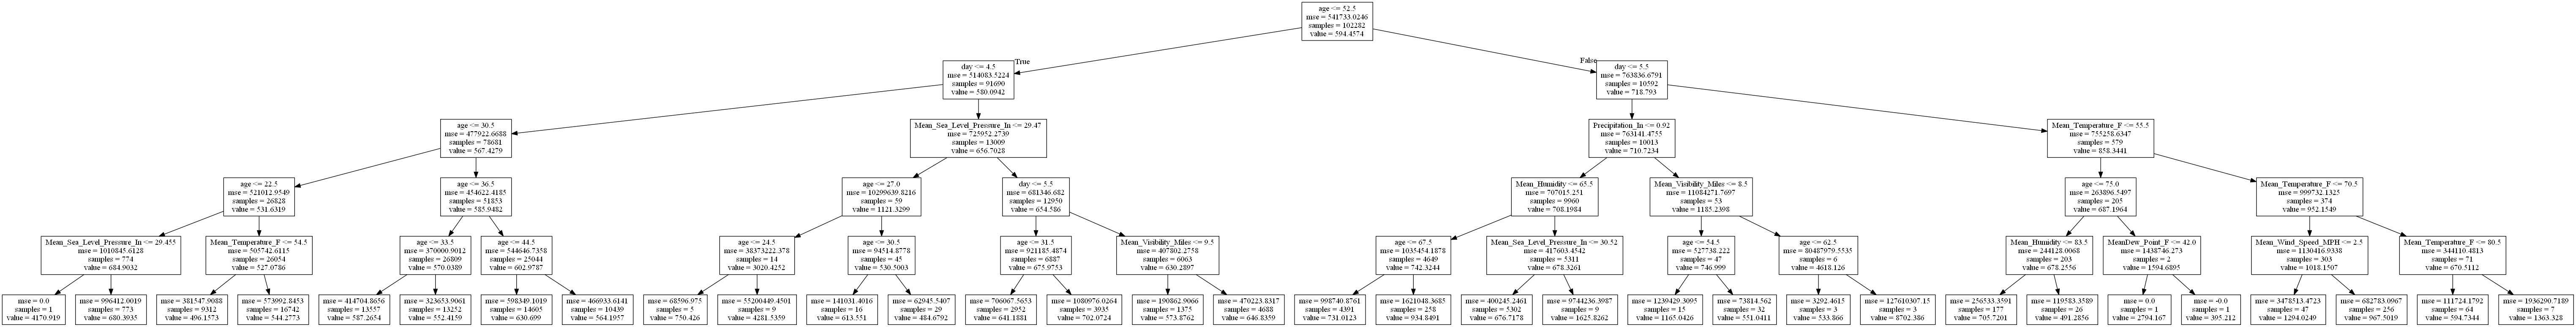

In [107]:
draw_tree(cs_dtr_fd0, cs_dtr_f.columns)

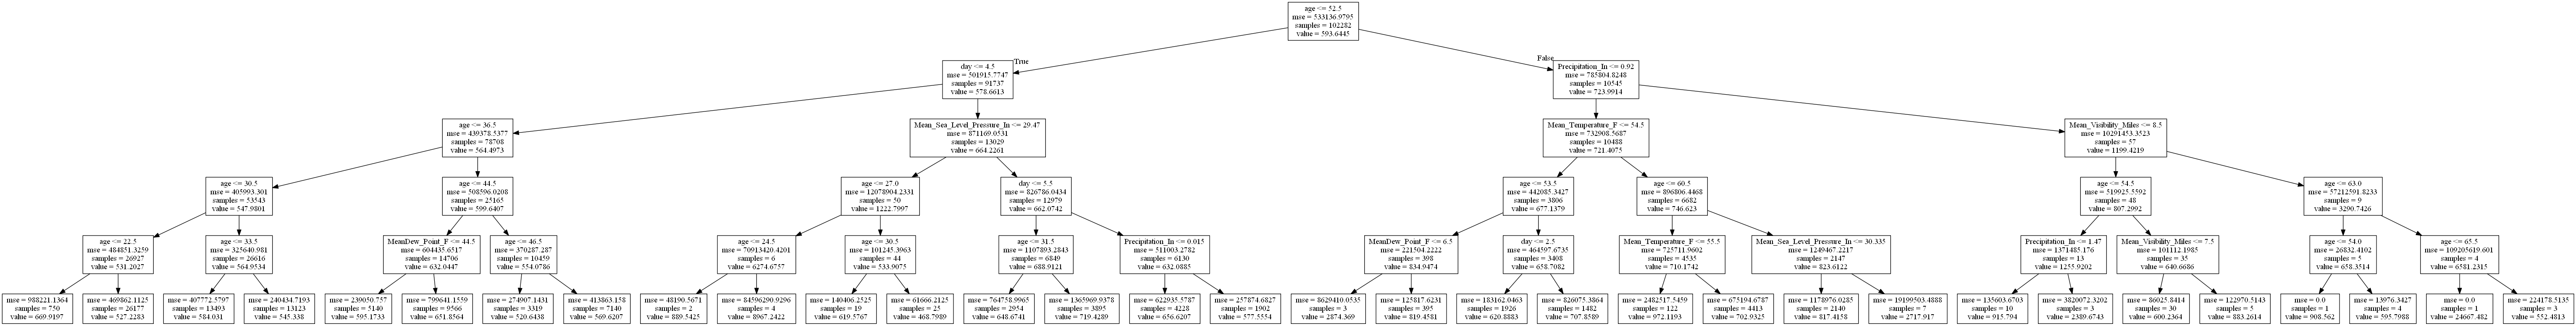

In [109]:
draw_tree(cs_dtr_fd1, cs_dtr_f.columns)

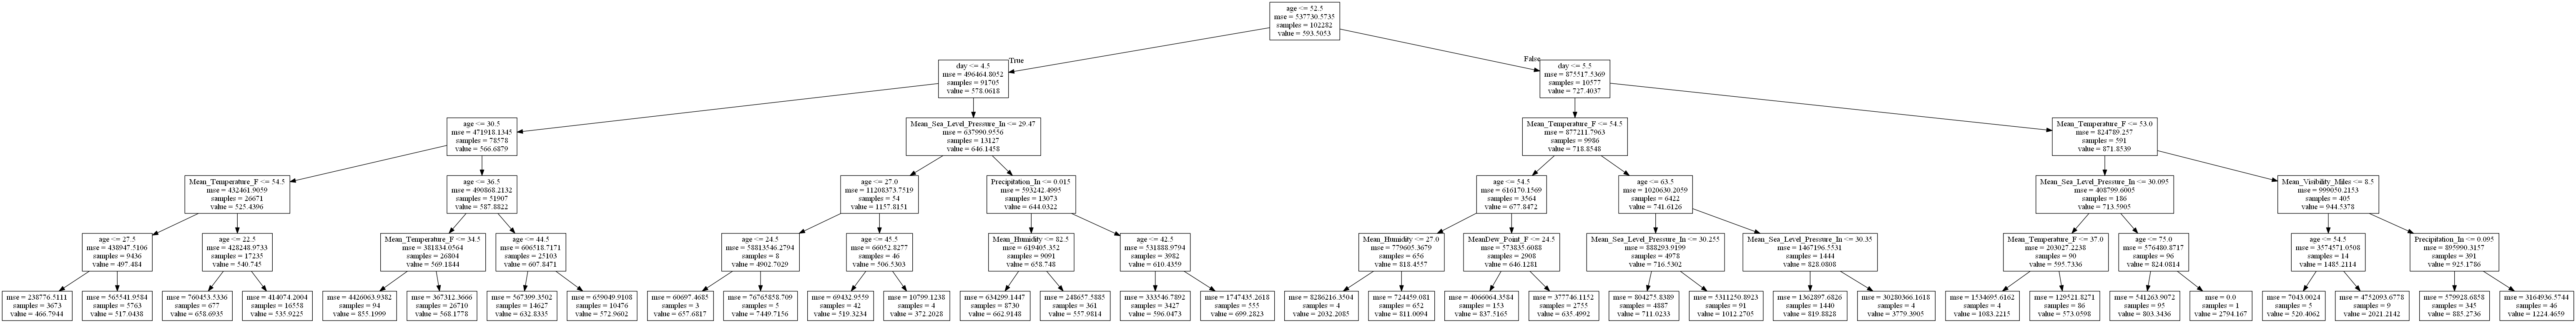

In [110]:
draw_tree(cs_dtr_fd2, cs_dtr_f.columns)

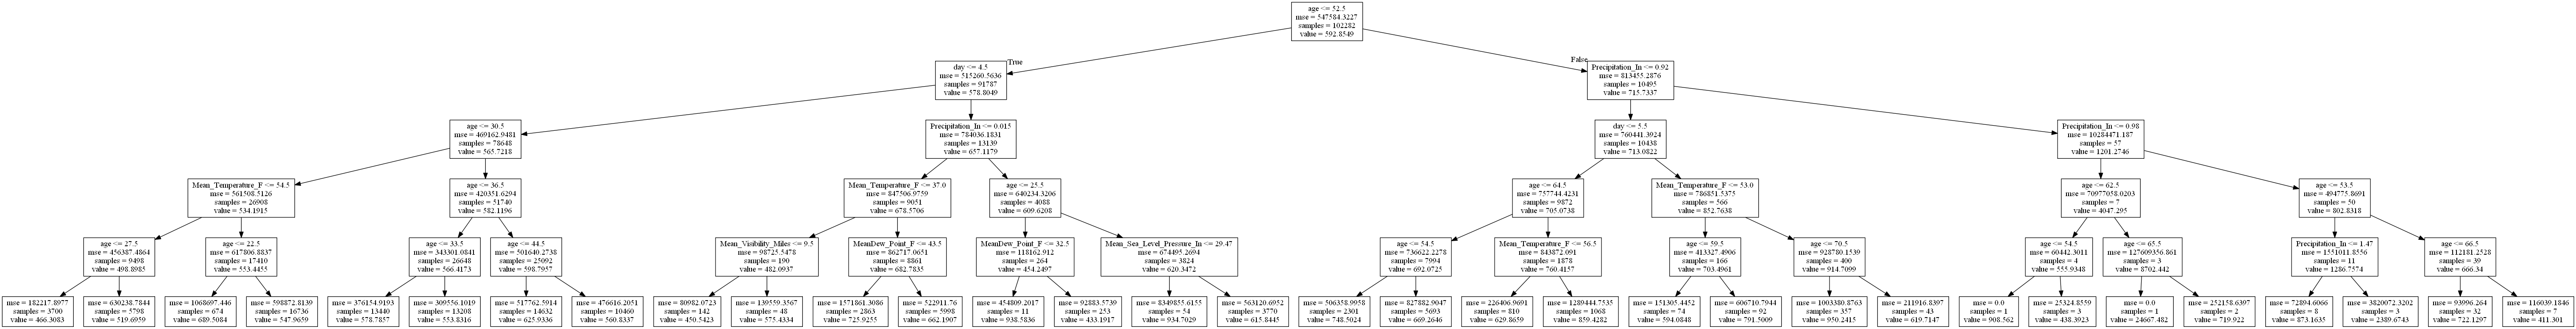

In [111]:
draw_tree(cs_dtr_fd3, cs_dtr_f.columns)

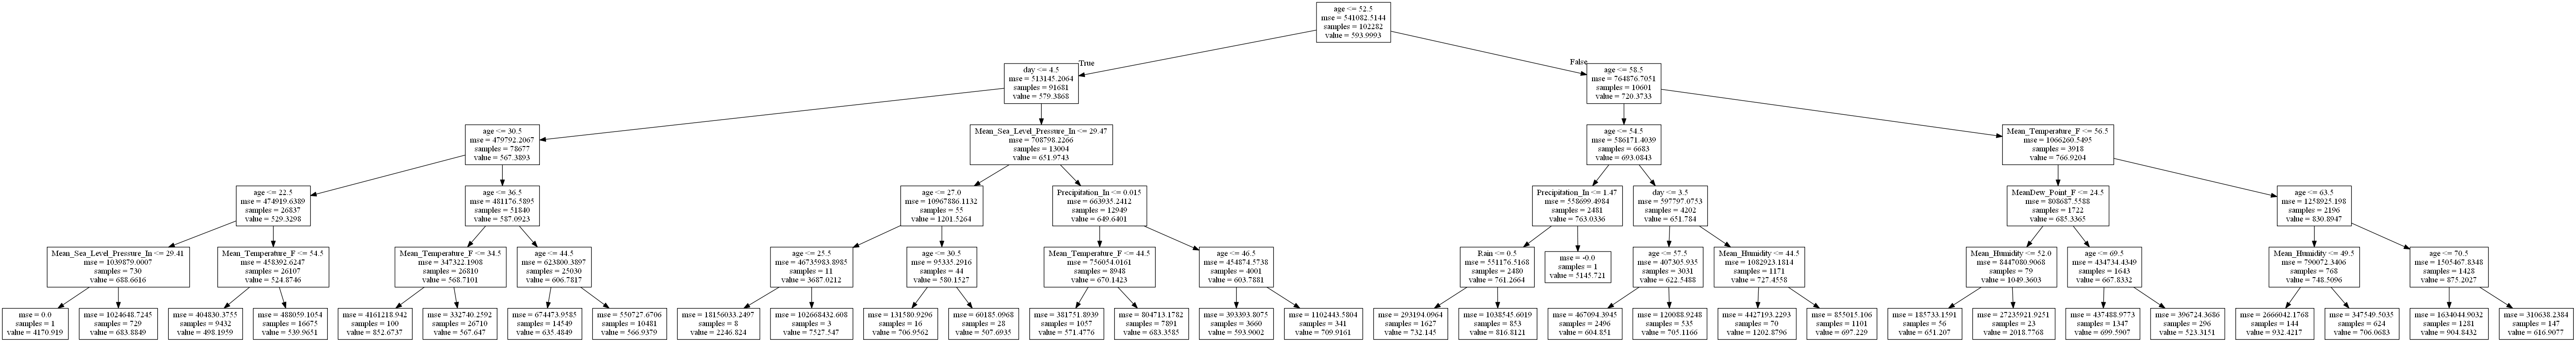

In [112]:
draw_tree(cs_dtr_fd4, cs_dtr_f.columns)

In [154]:
print(mean_absolute_error(cs_dtr_t.iloc[train_list[0]], 
                          cs_dtr_fd0.predict(cs_dtr_f.iloc[train_list[0]])))
print(mean_absolute_error(cs_dtr_t.iloc[train_list[1]], 
                          cs_dtr_fd1.predict(cs_dtr_f.iloc[train_list[1]])))
print(mean_absolute_error(cs_dtr_t.iloc[train_list[2]], 
                          cs_dtr_fd2.predict(cs_dtr_f.iloc[train_list[2]])))
print(mean_absolute_error(cs_dtr_t.iloc[train_list[3]], 
                          cs_dtr_fd3.predict(cs_dtr_f.iloc[train_list[3]])))
print(mean_absolute_error(cs_dtr_t.iloc[train_list[4]], 
                          cs_dtr_fd4.predict(cs_dtr_f.iloc[train_list[4]])))

291.327049203
289.536143747
289.821881049
289.637495849
290.07411753


In [155]:
print(mean_absolute_error(cs_dtr_t.iloc[test_list[0]], 
                          cs_dtr_fd0.predict(cs_dtr_f.iloc[test_list[0]])))
print(mean_absolute_error(cs_dtr_t.iloc[test_list[1]], 
                          cs_dtr_fd1.predict(cs_dtr_f.iloc[test_list[1]])))
print(mean_absolute_error(cs_dtr_t.iloc[test_list[2]], 
                          cs_dtr_fd2.predict(cs_dtr_f.iloc[test_list[2]])))
print(mean_absolute_error(cs_dtr_t.iloc[test_list[3]], 
                          cs_dtr_fd3.predict(cs_dtr_f.iloc[test_list[3]])))
print(mean_absolute_error(cs_dtr_t.iloc[test_list[4]], 
                          cs_dtr_fd4.predict(cs_dtr_f.iloc[test_list[4]])))

287.988461471
290.877800439
289.252333833
287.487091269
287.815170295
